In [73]:
import numpy as np
import pandas as pd

from scipy.signal import butter, sosfilt
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from config import Config
from dataset import Dataset

DATA_PATH = r"C:\Users\wilso\Desktop\Sleep-Stage-Classification\src\data_norm\collated.npz"

In [75]:
# Util
def varname(variable):
    names = []
    for name in list(globals().keys()):
        string = f'id({name})'
        if id(variable) == eval(string):
            names.append(name)
    return names[0]

# band pass butter worth filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], btype='band', output='sos')
    return sos


def bandpass_filter(data, lowcut, highcut, fs=100, order=14):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    filtered = sosfilt(sos, data)
    return filtered

def lowpass_filter(data, highcut, fs=100, order=14):
    sos = butter(order, highcut, btype='lowpass', fs=fs, output='sos')
    filtered = sosfilt(sos, data)
    return filtered

In [76]:
collated_data = Dataset(DATA_PATH)
print(collated_data.x.shape) # x shape
print(collated_data.y.shape) # y shape
print(collated_data.size_arr) # Size of individual records making up the collated record.
print(len(collated_data.size_arr)) # Number of records

(42308, 3000)
(42308,)
[841, 1127, 1103, 1186, 1025, 1009, 952, 911, 1235, 1200, 672, 1246, 843, 1016, 976, 1273, 1134, 1054, 1132, 1105, 1104, 1092, 928, 802, 1052, 977, 1028, 1004, 952, 952, 1762, 1144, 1003, 1002, 1773, 964, 920, 1535, 1274]
39


In [77]:
x = collated_data.x
y = collated_data.y

x0 = x[0]
sample_freq = 100

delta = lowpass_filter(x0, 4, sample_freq, 14)
theta = bandpass_filter(x0, 4, 8, sample_freq, 14)
alpha = bandpass_filter(x0, 8, 12, sample_freq, 14)
sigma = bandpass_filter(x0, 12, 15, sample_freq, 14)
beta1 = bandpass_filter(x0, 15, 22, sample_freq, 14)
beta2 = bandpass_filter(x0, 22, 30, sample_freq, 14)
gamma1 = bandpass_filter(x0, 30, 40, sample_freq, 14)
gamma2 = bandpass_filter(x0, 40, 49.5, sample_freq, 14)

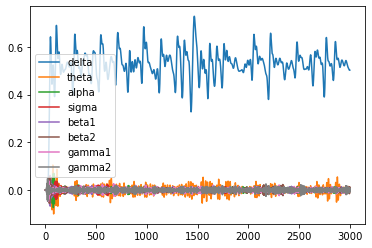

'delta'

In [78]:
plt.plot(delta, label='delta')
plt.plot(theta, label='theta')
plt.plot(alpha, label='alpha')
plt.plot(sigma, label='sigma')
plt.plot(beta1, label='beta1')
plt.plot(beta2, label='beta2')
plt.plot(gamma1, label='gamma1')
plt.plot(gamma2, label='gamma2')
plt.legend(loc='best')
plt.show()

In [86]:
freq_band_ls = [delta, theta, alpha, sigma, beta1, beta2, gamma1, gamma2]

fig = go.Figure()
for i, band in enumerate(freq_band_ls):
    fig.add_trace(go.Scatter(y=np.abs(band),
                    mode='lines',
                    name=f'{varname(freq_band_ls[i])}'))
fig.show()